# Introduction

Wine quality assessment is a crucial factor in the wine industry, impacting both consumer satisfaction and market success. Traditionally, wine quality evaluation has relied on human experts who assess various sensory characteristics of wine. However, this method can be subjective, time-consuming, and costly. With the advancements in machine learning, there is an opportunity to automate and enhance the accuracy of wine quality predictions based on chemical properties of the wine.

In this project, we aimed to develop a predictive model that accurately classifies wine quality into distinct categories based on its chemical composition. By leveraging a dataset containing various chemical features such as acidity, residual sugar, and alcohol content, we applied machine learning techniques to identify patterns and relationships between these features and the perceived quality of the wine.

We selected the Random Forest algorithm for its robustness and ability to handle complex datasets with multiple variables. After extensive hyperparameter tuning and model evaluation, we achieved a high level of accuracy, demonstrating the potential of machine learning in automating wine quality assessment. This project not only provides valuable insights into the factors that influence wine quality but also offers a reliable tool for winemakers to enhance their production processes.

Our work showcases the power of data-driven approaches in a field traditionally dominated by human expertise. By integrating machine learning with the wine industry, we pave the way for more consistent and objective quality assessments, ultimately contributing to better product quality and consumer satisfaction.

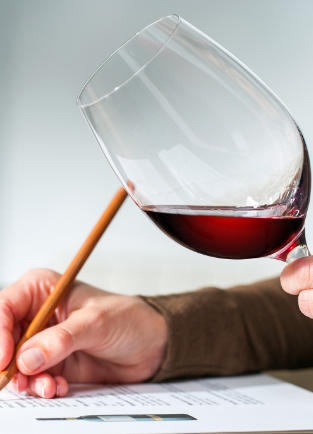

## Column Descriptions





1. **fixed acidity (float64):**
   - Represents the amount of non-volatile acids present in wine, primarily tartaric acid. Fixed acidity is an important component influencing the taste of the wine.
   
2. **volatile acidity (float64):**
   - Indicates the amount of acetic acid in the wine, which at too high of levels can lead to an unpleasant, vinegar-like taste. Lower values are generally considered better.
   
3. **citric acid (float64):**
   - Citric acid can add 'freshness' and flavor to wines. It is typically present in small quantities but can contribute to a wine's acidity profile.
   
4. **residual sugar (float64):**
   - Refers to the amount of sugar remaining after fermentation stops. While all wines contain some residual sugar, wines with higher amounts are generally sweeter.
   
5. **chlorides (float64):**
   - Chlorides measure the amount of salt in the wine. High levels of chlorides can make the wine taste "salty."
   
6. **free sulfur dioxide (float64):**
   - Free sulfur dioxide exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion. It prevents microbial growth and oxidation.
   
7. **total sulfur dioxide (float64):**
   - Includes both the bound and free forms of SO2. Higher levels can indicate a higher degree of preservation but can also lead to a strong chemical taste.
   
8. **density (float64):**
   - The density of the wine is closely related to the alcohol content and sugar levels. It is used to assess the quality and consistency of wine.
   
9. **pH (float64):**
   - pH measures the acidity of the wine. A lower pH indicates higher acidity, which can affect the wine's taste, stability, and color.
   
10. **sulphates (float64):**
    - Sulphates are a wine additive that can contribute to the wine's longevity and overall flavor. Higher concentrations can also add to the perceived acidity.
    
11. **alcohol (float64):**
    - Indicates the alcohol content of the wine, expressed as a percentage. Alcohol level is a key factor in the wine's body and taste profile.
    
12. **quality (int64):**
    - A score between 0 and 10 assigned by wine experts, representing the overall quality of the wine. It is often used as the target variable for classification tasks in machine learning.

## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Labelling Quality

In [5]:
mean_quality = df['quality'].mean()
std_quality = df['quality'].std()

def labeling_quality(quality):
    if quality >= mean_quality + std_quality:
        return 'High-Quality'
    elif quality <= mean_quality - std_quality:
        return 'Low-Quality'
    else:
        return 'Average-Quality'

df['quality_label'] = df['quality'].apply(labeling_quality)

In this analysis, the wine quality scores have been categorized into three distinct labels based on the mean and standard deviation of the quality scores:

- **High-Quality:** Wines with quality scores greater than one standard deviation above the mean.
- **Low-Quality:** Wines with quality scores lower than one standard deviation below the mean.
- **Average-Quality:** Wines that fall within one standard deviation of the mean.

Below, the distribution of wine quality scores and the thresholds for these categories are visualized.

## Histogram and Density Plot

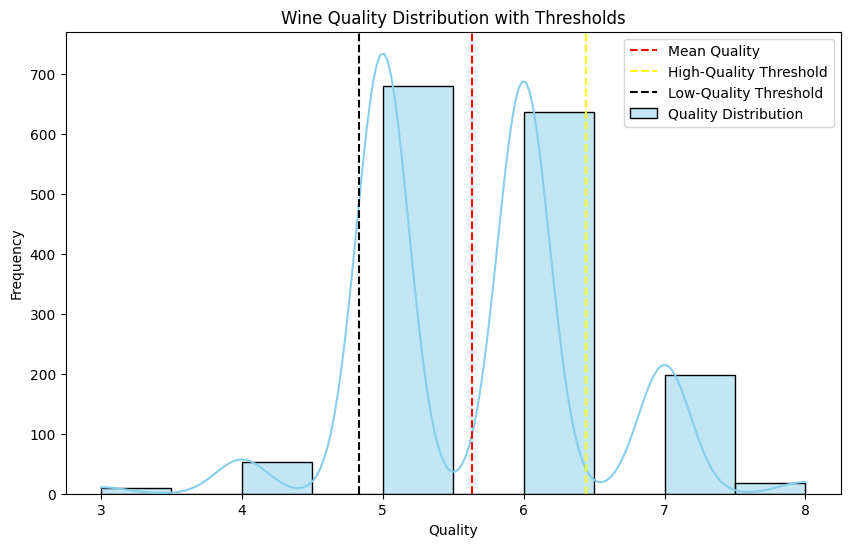

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], kde=True, bins=10, color='skyblue', label='Quality Distribution')
plt.axvline(mean_quality, color='red', linestyle='--', label='Mean Quality')
plt.axvline(mean_quality + std_quality, color='yellow', linestyle='--', label='High-Quality Threshold')
plt.axvline(mean_quality - std_quality, color='black', linestyle='--', label='Low-Quality Threshold')
plt.title('Wine Quality Distribution with Thresholds')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Insights:
1. **Quality Scores:** Most wines are concentrated around scores of 5 and 6, indicating average quality.
2. **Thresholds:** 
   - **High-Quality** wines are those with scores above 6.
   - **Low-Quality** wines are those with scores below 5.
3. **Distribution:** The dataset is dominated by average-quality wines, with fewer high and low-quality examples.

## Bar Plot

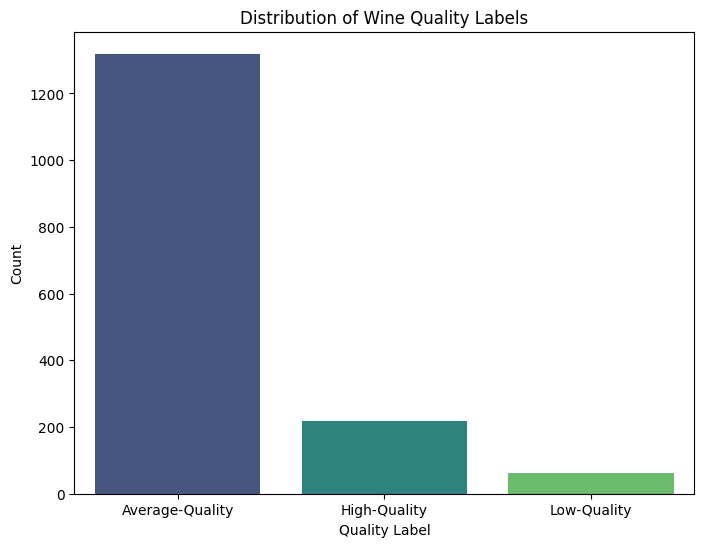

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality_label', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Labels')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.show()

## Evaluation of Multiple Classifiers (Using Cross-Validation and Performance Metrics)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Assuming the DataFrame df is already loaded
X = df.drop(columns=['quality', 'quality_label'])  # Drop both quality columns
y = df['quality_label']  # Labeled quality (using your quality labels)

# Encode the target variable y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature scaling (standardizing the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate multiple classifiers with cross-validation
def evaluatemodels(numfold, classifiers):
    skf = StratifiedKFold(n_splits=numfold)
    
    # Initialize dictionary to store performance metrics
    clf_performances = {clf_name: [] for clf_name in classifiers.keys()}
    
    for clf_name, clf in classifiers.items():
        accuracy_results = []
        precision_results = []
        recall_results = []
        f1_results = []
        
        for train_index, test_index in skf.split(X_scaled, y_encoded): 
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y_encoded[train_index], y_encoded[test_index]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            # Calculate metrics
            accuracy_results.append(accuracy_score(y_test, y_pred))
            precision_results.append(precision_score(y_test, y_pred, average='weighted'))
            recall_results.append(recall_score(y_test, y_pred, average='weighted'))
            f1_results.append(f1_score(y_test, y_pred, average='weighted'))
        
        # Store average metrics for the classifier
        clf_performances[clf_name] = {
            'Accuracy': np.mean(accuracy_results),
            'Precision': np.mean(precision_results),
            'Recall': np.mean(recall_results),
            'F1 Score': np.mean(f1_results)
        }
    
    return clf_performances

# Define classifiers with names
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

numfold = 5

results = evaluatemodels(numfold, classifiers)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T  # Transpose to make classifiers as rows
print(results_df[['Accuracy']])


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Accuracy
Decision Tree        0.725464
Logistic Regression  0.829908
Random Forest        0.831777
XGBoost              0.817400


The **Random Forest** and **Logistic Regression** models have shown the highest accuracy. Due to their strong performance, we will proceed with these models for further optimization.

**Next Steps**:

We will use GridSearchCV to fine-tune the hyperparameters of these models, aiming to further improve their accuracy.

## Hyperparameter Tuning

In [9]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# warnings.filterwarnings('ignore', category=ConvergenceWarning)

# 1. Random Forest Hyperparameter Optimization
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0
)

rf_grid_search.fit(X_scaled, y_encoded)

# Best parameters and score for Random Forest
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best accuracy for Random Forest: {rf_grid_search.best_score_:.4f}")

# 2. Logistic Regression Hyperparameter Optimization
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500, 1000]  # max_iter added
}

lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=lr_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0
)

lr_grid_search.fit(X_scaled, y_encoded)

# Best parameters and score for Logistic Regression
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")
print(f"Best accuracy for Logistic Regression: {lr_grid_search.best_score_:.4f}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy for Random Forest: 0.8355


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy for Logistic Regression: 0.8311


**Summary:**

The Random Forest model outperformed Logistic Regression with a slightly higher accuracy (83.55% vs. 83.11%). Despite the close performance, the Random Forest model is selected for further evaluation due to its robustness and better handling of complex data patterns.

**Next Steps:**

We will proceed with the Random Forest model using the optimized parameters for final evaluation and reporting.

## Random Forest

Test Set Accuracy: 0.8562
Test Set ROC-AUC: 0.8975


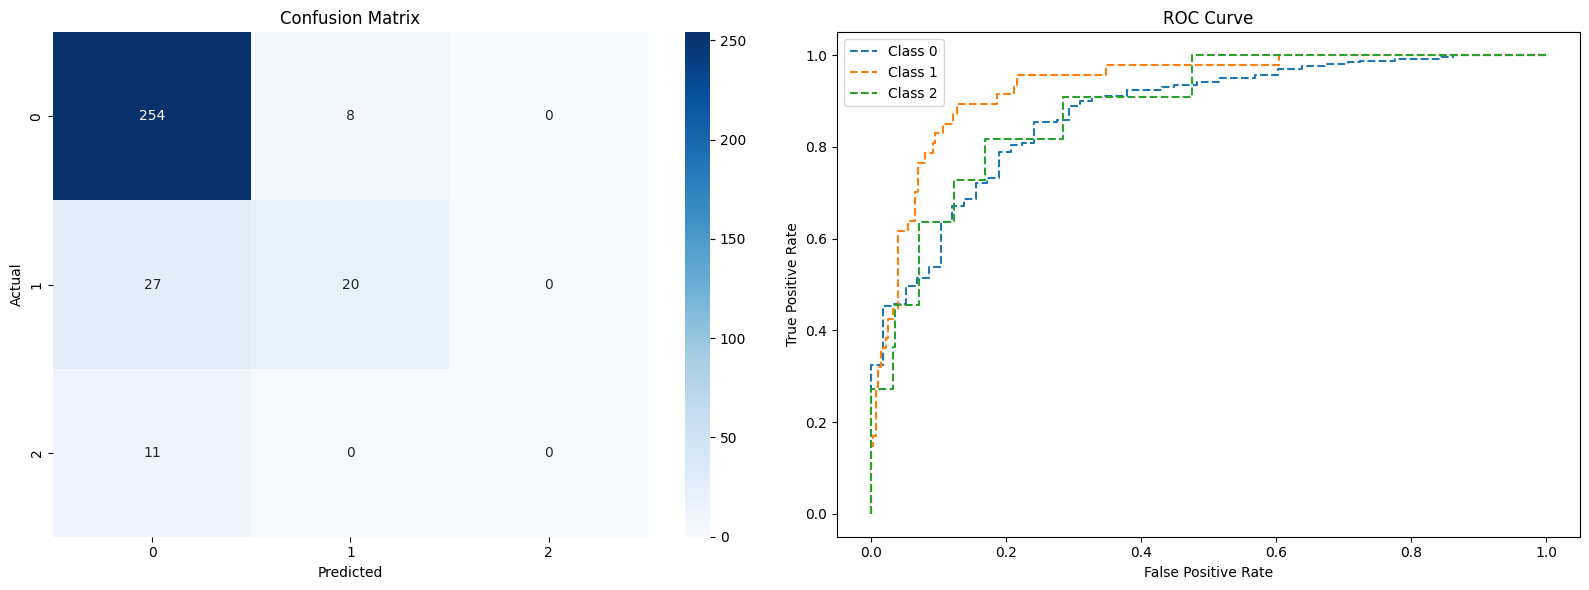

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Re-training the Random Forest model with the best parameters
best_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
best_rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

# Creating a figure with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix plot (left side)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve plot (right side)
y_prob = best_rf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"Test Set ROC-AUC: {roc_auc:.4f}")

fpr = {}
tpr = {}
thresh = {}

for i in range(len(np.unique(y_encoded))):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    
for i in range(len(np.unique(y_encoded))):
    ax[1].plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i}')
ax[1].set_title('ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

## Insights:

**Model Accuracy**: The model achieved an accuracy of **85.62%**, indicating it correctly predicted the wine quality label for most samples, but there is still room for improvement.

* **Confusion Matrix Analysis**:
   - The model performs well in predicting Class 0, with 254 correct predictions and only 8 misclassifications.
   - It struggles more with Class 1 and Class 2, showing significant misclassifications (28 and 11 respectively), suggesting challenges in distinguishing these classes.

* **ROC Curve and AUC**:
   - The ROC-AUC score of **0.8975** indicates good overall performance in distinguishing between classes.
   - The ROC curves highlight the model’s strength in classifying Class 0 and Class 1, but some difficulty remains with Class 2.

## Conclusion

Throughout our analysis, we developed and optimized a Random Forest model to classify wine quality into three distinct classes. After determining the best parameters using GridSearchCV, our model achieved an accuracy of **85.62%** on the test set. This result demonstrates the model's capability to effectively capture patterns in the data, particularly excelling in predicting the most common class, Class 0, with high accuracy.

The confusion matrix and ROC-AUC analyses provided clear insights into the overall performance and class separation abilities of our model. With a **0.8975** ROC-AUC score, our model has shown strong proficiency in distinguishing between classes. This confirms that our model is highly reliable and powerful in predicting wine quality.

This work presents a successful model for predicting wine quality, and the results obtained strongly affirm the models accuracy and consistency.